# Future Structure Prediction  
Graph theory is highly useful for predicting future structures, but making complete predictions can be challenging. There are several methods and tools available, but the accuracy of predictions depends on many factors. These include the current characteristics of the network, the choice of model, and the availability of information about future growth patterns of the network.

A common approach is to use growth models or diffusion models to predict the future development of a network. However, these models often contain probabilistic elements and are typically used as a means of understanding trends or patterns rather than making precise predictions.

## Link Prediction  
For example, link prediction is a task where potential future links in the unknown parts of a network are inferred. Specifically, this involves predicting the overall network structure and link patterns based on partial information from the existing network.  
Link prediction can be approached using various methods, with some common approaches including:

**Similarity-Based Methods:** These methods estimate unknown links based on the similarity between existing nodes or links, considering factors like the number of common neighbors or attribute similarities.

**Statistical Models:** This approach models the patterns or statistical properties within a network and uses the model to predict future links, taking into account properties such as network randomness or clustering coefficients.

**Machine Learning Approaches:** Machine learning techniques are employed to learn patterns within the network and predict unknown links. In recent years, methods using Graph Neural Networks (GNNs) have gained attention for this purpose.

## Similarity  
**Similarity** is a critical factor in link prediction. By measuring similarity, the strength of relationships or connections between nodes in a network can be evaluated, which helps to estimate the likelihood of future link formation. Several common methods for measuring similarity are used in link prediction.

## Common Similarity Measures  
### 1. Common Neighbors  
- **This method counts the number of common neighbors (shared friends) between two nodes.** The higher the number of common neighbors, the greater the likelihood that a link will form between the two nodes.  
- **Similarity Score:** $C_N(u, v) = |\Gamma(u) \cap \Gamma(v)|$  
    - $Γ(u)$ represents the set of neighbors of node $u$.  
    - $Γ(v)$ represents the set of neighbors of node $v$.  
    - $Γ(u)∩Γ(v)$ is the size of the intersection of the neighbor sets of nodes $u$ and $v$, i.e., the number of common neighbors between the two nodes.  
- **Interpretation of Results:**  
    - **High value:** A larger number of common neighbors indicates that **the two nodes share many common neighbors**, suggesting a higher probability of future link formation. This is based on the concept of "triadic closure" in social networks, where nodes with common friends are more likely to form links.  
    - **Low value:** Fewer or no common neighbors suggest a **lower likelihood of link formation** between the two nodes, though other factors like node attributes or alternative similarity measures may also need to be considered.  
- **Advantages:**  
    - Simple and easy to compute: The number of common neighbors is straightforward to calculate, making it efficient for large networks.  
- **Limitations:**  
    - In very sparse networks, the number of common neighbors tends to be small, which can reduce prediction accuracy.  
    - Nodes with extremely high degrees tend to have many common neighbors, leading to high similarity with multiple nodes.

### 2. Jaccard Coefficient  
- **This method corrects for node degree by dividing the number of common neighbors by the total number of neighbors of both nodes.**  
- **Similarity Score:** $Jaccard(u,v) = \frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$  
    - $Γ(u)$ represents the set of neighbors of node $u$.  
    - $Γ(v)$ represents the set of neighbors of node $v$.  
    - $∣Γ(u)∩Γ(v)∣$ is the number of common neighbors between nodes $u$ and $v$.  
    - $∣Γ(u)∪Γ(v)∣$ is the total number of neighbors of nodes $u$ and $v$, i.e., the union of their neighbor sets.  

- **Detailed Explanation:**  
    - **Numerator:** $∣Γ(u)∩Γ(v)∣$ is the number of neighbors shared between nodes $u$ and $v$.  
    - **Denominator:** $∣Γ(u)∪Γ(v)∣$ represents the total number of distinct neighbors for nodes $u$ and $v$, establishing the "comparison range" for the similarity.  

- **Interpretation of Results:**  
    - A higher Jaccard coefficient indicates a higher proportion of shared neighbors, suggesting a greater likelihood that the node pair will form a future link.  

- **Advantages:**  
    - It normalizes similarity between nodes, allowing fair comparisons even when the degrees of the nodes differ significantly.  

- **Limitations:**  
    - In very sparse networks, the denominator of the Jaccard coefficient tends to be small, often resulting in low values.  
    - In very dense networks, the denominator tends to be large, often resulting in high values.

### 3. Adamic/Adar Index  
- **This measure emphasizes common neighbors with fewer connections. It evaluates the number of common neighbors, weighting by the inverse logarithm of the neighbor's degree.**  
- **Similarity Score:** $AA(u,v) = \sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{\log |\Gamma(w)|}$  
    - $Γ(u)$ is the set of neighbors of node $u$.  
    - $Γ(v)$ is the set of neighbors of node $v$.  
    - $Γ(u)∩Γ(v)$ is the set of common neighbors between nodes $u$ and $v$.  
    - $w$ represents a common neighbor of nodes $u$ and $v$.  
    - $∣Γ(w)∣$ is the degree of node $w$.  
    - $log∣Γ(w)∣$ is the logarithm of the degree of node $w$.  

- **Detailed Explanation:**  
    - **Weighting:** In the Adamic/Adar Index, the smaller the degree of the common neighbor $w$, the higher its weight, reflecting that rare neighbors are more valuable in determining similarity.  
    - **Similarity Score:** The Adamic/Adar Index weights the score based on the inverse logarithm of the degrees of common neighbors, giving more importance to nodes with fewer connections.  

- **Interpretation of Results:**  
    - A higher Adamic/Adar Index suggests that two nodes have many common neighbors, and that those common neighbors are relatively rare (low-degree), indicating a higher probability of future link formation.

- **Advantages:**  
    - It considers the importance of common neighbors' degrees, making it less affected by high-degree nodes.  

- **Limitations:**  
    - It may be influenced by extremely low-degree nodes.  
    - The computational cost can be higher, increasing as the network size grows.

### 4. Resource Allocation Index  
- The Resource Allocation Index evaluates the similarity between nodes based on how resources are distributed through their common neighbors. Nodes with fewer neighbors are weighted more heavily.  
- **Explanation:**  
    - **Weighted Resource Allocation:** The Resource Allocation Index adjusts the score based on the inverse degree of the common neighbors, emphasizing nodes with lower degrees.  
    - **Comparison:** Similar to the Adamic/Adar Index, it reduces the impact of common neighbors with many connections, focusing more on those with fewer links.  
- **Similarity Score:** $RA(u,v) = \sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$  
    - $Γ(u)$ is the set of neighbors of node $u$.  
    - $Γ(v)$ is the set of neighbors of node $v$.  
    - $Γ(u)∩Γ(v)$ is the set of common neighbors between nodes $u$ and $v$.  
    - $∣Γ(w)∣$ is the degree of node $w$.

- **Interpretation of Results:**  
    - A higher Resource Allocation Index suggests that the two nodes share neighbors with fewer links, indicating a higher probability of future link formation.  

- **Advantages:**  
    - It emphasizes the contribution of low-degree nodes, making it effective in sparse networks or cases where nodes have low degrees.  

- **Limitations:**  
    - The index tends to give smaller scores when nodes have high degrees, making it less effective in highly connected networks.  
    - The computational cost increases in large networks.

### 5. Preferential Attachment  
- **This method evaluates the product of node degrees.** It is based on the idea that nodes with higher degrees are more likely to form links, following a model where new nodes connect to existing nodes in proportion to their degree.  
- **Similarity Score:** $PA(u,v) = |\Gamma(u)| \cdot |\Gamma(v)|$  
    - $∣Γ(u)∣$ is the degree of node $u$, representing the number of other nodes connected to $u$.  
    - $∣Γ(v)∣$ is the degree of node $v$, representing the number of other nodes connected to $v$.  
    - $PA(u,v)$ represents the probability that a link will form between nodes $u$ and $v$.  

- **Interpretation of Results:**  
    - A higher Preferential Attachment score suggests a higher likelihood of link formation between high-degree nodes.

- **Advantages:**  
    - It is effective when high-degree

 nodes play a central role in the network.  
    - It captures the growth process of networks and is computationally efficient for large networks.  

- **Limitations:**  
    - It may overemphasize links between high-degree nodes, making it less effective for predicting links between low-degree nodes.

## Applications of Similarity  
**1. Central Role in Network Analysis:**  
   - Similarity plays a central role in network analysis, helping to understand relationships between nodes and evaluate node centrality. This is important in fields like social network analysis, biological network analysis, and information propagation modeling.  
   
**2. Anomaly Detection and Pattern Identification:**  
   - Similarity can be used to detect anomalies or identify patterns within a network. Changes in certain similarity metrics may indicate unexpected network changes or abnormal behavior.  
   
**3. Community Detection:**  
   - Similarity is key to understanding community structures within a network. Similar nodes tend to cluster together, and each cluster may represent a different community.  
   
**4. Network Visualization and Interpretation:**  
   - Similarity is a valuable tool for visualizing and understanding networks. By connecting similar nodes, the structure of the network becomes easier to interpret.

## Similarity Measure Calculation  
The following script visualizes the Karate Club network and evaluates the similarity between a specific pair of nodes (nodes 4 and 5). It calculates and outputs the neighbors, degree, number of common neighbors, Jaccard coefficient, Adamic/Adar index, Resource Allocation Index, and Preferential Attachment score for the node pair, providing a comprehensive assessment of their similarity and the potential for future link formation.  

This script is designed to compute the link prediction metrics for the specific node pair (nodes 4 and 5) and output the results. It is suitable for analyzing link prediction for individual pairs. To predict links for other pairs, simply modify the node pair (x, y) values within the script.  

The results displayed in the console provide information about nodes 4 and 5 in the Karate Club graph, along with the computed similarity measures. The following explains each item:

**1. Vertex pair: 4 and 5**  
・ Indicates that the vertex pair being evaluated is nodes 4 and 5.  

**2. Neighbors of 4: [0, 6, 10]**  
・ This lists the neighbors of node 4. In this case, nodes 0, 6, and 10 are adjacent to node 4.  

**3. Neighbors of 5: [0, 6, 10, 16]**  
・ This lists the neighbors of node 5. In this case, nodes 0, 6, 10, and 16 are adjacent to node 5.  

**4. Degree of 4: 3**  
・ This shows the degree (number of connections) of node 4, which is 3.  

**5. Degree of 5: 4**  
・ This shows the degree (number of connections) of node 5, which is 4.  

**6. Common neighbors: 3**  
・ This represents the number of common neighbors between nodes 4 and 5. In this case, nodes 0, 6, and 10 are common neighbors, making the count 3.  

**7. Jaccard coefficient: 0.75**  
・ This is the Jaccard coefficient for nodes 4 and 5. The Jaccard coefficient is calculated as $\frac{|N(4) \cap N(5)|}{|N(4) \cup N(5)|} = \frac{3}{4} = 0.75$. A higher value indicates a stronger similarity between nodes 4 and 5.  

**8. Adamic/Adar index: 1.9922605072935597**  
・ This is the Adamic/Adar index for nodes 4 and 5. The Adamic/Adar index is calculated as $\sum_{u \in N(4) \cap N(5)} \frac{1}{\log(|N(u)|)}$. A higher index value indicates a stronger connection between nodes 4 and 5.  

**9. Resource Allocation Index: 0.6458333333333333**  
・ This is the Resource Allocation Index for nodes 4 and 5, representing the sum of the inverse of the degrees of common neighbors. A higher value indicates a stronger similarity between nodes 4 and 5.  

**10. Preferential attachment score: 12**  
・ This is the Preferential Attachment score for nodes 4 and 5, calculated as $|N(4)| \times |N(5)|$. A higher score suggests a greater likelihood that many edges will form between nodes 4 and 5 in the future.

Vertex pair: 4 and 5
Neighbors of 4 : [0, 6, 10]
Neighbors of 5 : [0, 6, 10, 16]
Degree of 4 : 3
Degree of 5 : 4
Common neighbors: 3
Jaccard coefficient: 0.75
Adamic/Adar index: 1.9922605072935597
Resource Allocation Index: 0.6458333333333333
Preferential attachment score: 12


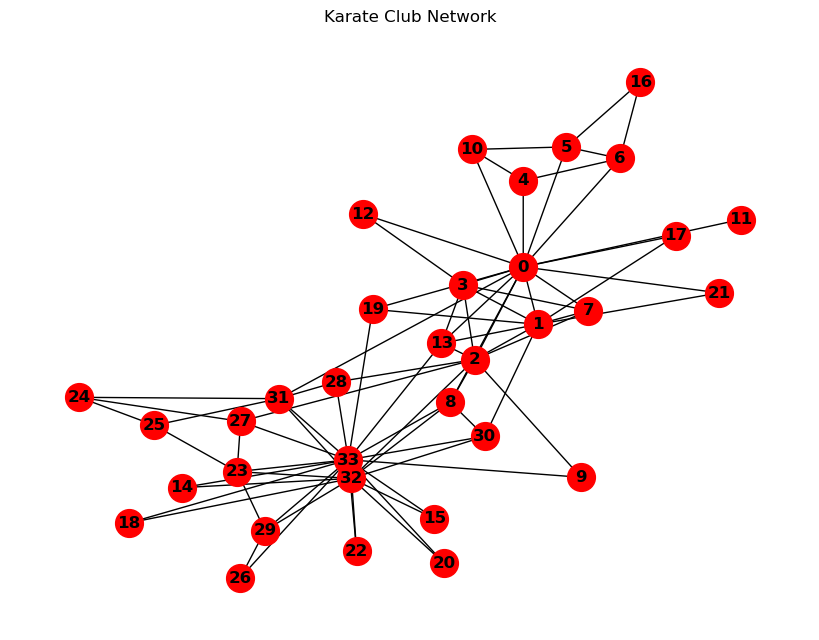

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the Karate Club graph
G = nx.karate_club_graph()

# Draw the graph
plt.figure(figsize=(8, 6))  # Adjust the size of the figure as needed
nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
plt.title("Karate Club Network")  # Add a title to the graph

# Output information for the node pair
x = 4
y = 5
print("Vertex pair:", x, "and", y)
print("Neighbors of", x, ":", list(G.neighbors(x)))
print("Neighbors of", y, ":", list(G.neighbors(y)))
print("Degree of", x, ":", G.degree(x))
print("Degree of", y, ":", G.degree(y))

# Calculate and output the number of common neighbors and similarity measures
common_neighbors = len(list(nx.common_neighbors(G, x, y)))
print("Common neighbors:", common_neighbors)

# Calculate and output the Jaccard coefficient
jaccard_coefficient = list(nx.jaccard_coefficient(G, [(x, y)]))[0][2]
print("Jaccard coefficient:", jaccard_coefficient)

# Calculate and output the Adamic/Adar index
adamic_adar = list(nx.adamic_adar_index(G, [(x, y)]))[0][2]
print("Adamic/Adar index:", adamic_adar)

# Calculate and output the Resource Allocation Index
resource_allocation = list(nx.resource_allocation_index(G, [(x, y)]))[0][2]
print("Resource Allocation Index:", resource_allocation)

# Calculate and output the Preferential Attachment score
preferential_attachment = list(nx.preferential_attachment(G, [(x, y)]))[0][2]
print("Preferential attachment score:", preferential_attachment)

# Show the graph
plt.show()


The following script calculates link prediction metrics for the entire graph and outputs the top results.<br>
The console output can be interpreted as follows:

**When the number of common neighbors is high:** If two nodes have many common adjacent nodes, it is considered likely that these nodes will form a link.<br>

**When the Jaccard coefficient is high:** If the Jaccard coefficient is close to 1, the two nodes are very similar, and there is a high likelihood that a new edge will be formed between them.<br>

**When the Adamic/Adar index is high:** A high Adamic/Adar index suggests that the common neighbors between the node pair play an important role, increasing the possibility of a new link being formed.<br>

**When the Preferential Attachment score is high:** When nodes in a network are strongly connected, newly added nodes tend to connect with those that already have strong existing ties.<br>

**When the Resource Allocation Index is high:** A high Resource Allocation Index suggests that the node possesses significant resources (common neighbors or strong connections), which may contribute to the formation of new links.<br>

Common Neighbors
[(2, 33, 6), (0, 33, 4), (7, 13, 4), (0, 32, 3), (1, 8, 3), (1, 33, 3), (2, 30, 3), (2, 31, 3), (4, 5, 3), (6, 10, 3)]
Jaccard Coefficient
[(14, 15, 1.0), (14, 18, 1.0), (14, 20, 1.0), (14, 22, 1.0), (15, 18, 1.0), (15, 20, 1.0), (15, 22, 1.0), (17, 21, 1.0), (18, 20, 1.0), (18, 22, 1.0)]
Adamic/Adar
[(2, 33, 4.719381261461351), (0, 33, 2.7110197222973085), (1, 33, 2.252921681630931), (4, 5, 1.9922605072935597), (6, 10, 1.9922605072935597), (7, 13, 1.8081984819901584), (2, 31, 1.6733425912309228), (23, 31, 1.6656249548734432), (23, 24, 1.631586747071319), (0, 32, 1.613740043014111)]
Preferential Attachment
[(0, 33, 272), (0, 32, 192), (2, 33, 170), (1, 33, 153), (1, 32, 108), (3, 33, 102), (0, 23, 80), (3, 32, 72), (5, 33, 68), (6, 33, 68)]
Resource Allocation Index
[(2, 33, 1.5666666666666664), (0, 33, 0.9), (1, 33, 0.7833333333333333), (4, 5, 0.6458333333333333), (6, 10, 0.6458333333333333), (23, 24, 0.5833333333333333), (25, 27, 0.5333333333333333), (0, 16, 0.5), (2

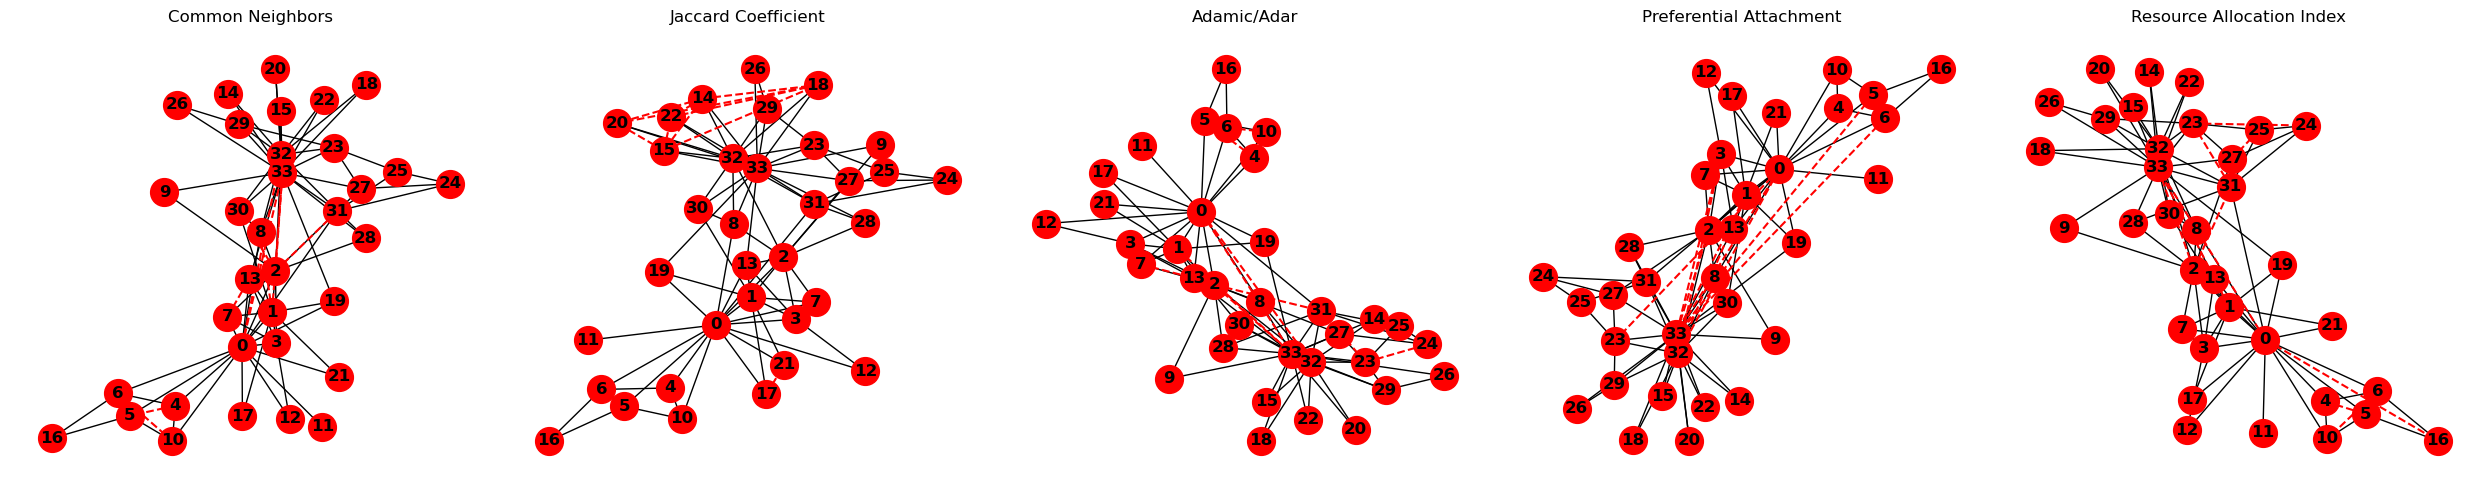

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize lists for link prediction metrics
CN = []  # Common Neighbors
JC = []  # Jaccard Coefficient
AA = []  # Adamic/Adar Index
PA = []  # Preferential Attachment
RA = []  # Resource Allocation Index
k = 10  # Display top k results

# Generate Karate Club graph
G = nx.karate_club_graph()

# Get the number of nodes in the graph
n = nx.number_of_nodes(G)

# Calculate link prediction metrics for all node pairs
for x in range(n):
    for y in range(x + 1, n):
        if not G.has_edge(x, y):  # For node pairs that do not have an edge
            # Calculate the number of common neighbors and add to list
            CN.append(tuple([x, y, len(list(nx.common_neighbors(G, x, y)))]))
            # Calculate Jaccard Coefficient and add to list
            JC.append(list(nx.jaccard_coefficient(G, [(x, y)]))[0])
            # Calculate Adamic/Adar Index and add to list
            AA.append(list(nx.adamic_adar_index(G, [(x, y)]))[0])
            # Calculate Preferential Attachment Score and add to list
            PA.append(list(nx.preferential_attachment(G, [(x, y)]))[0])
            # Calculate Resource Allocation Index and add to list
            RA.append(list(nx.resource_allocation_index(G, [(x, y)]))[0])

# Display the results of the link prediction metrics
print("Common Neighbors")
CN_top = sorted(CN, key=lambda x: x[2], reverse=True)[:k]  # Sort by common neighbors and display top k
print(CN_top)

print("Jaccard Coefficient")
JC_top = sorted(JC, key=lambda x: x[2], reverse=True)[:k]  # Sort by Jaccard Coefficient and display top k
print(JC_top)

print("Adamic/Adar")
AA_top = sorted(AA, key=lambda x: x[2], reverse=True)[:k]  # Sort by Adamic/Adar Index and display top k
print(AA_top)

print("Preferential Attachment")
PA_top = sorted(PA, key=lambda x: x[2], reverse=True)[:k]  # Sort by Preferential Attachment Score and display top k
print(PA_top)

print("Resource Allocation Index")
RA_top = sorted(RA, key=lambda x: x[2], reverse=True)[:k]  # Sort by Resource Allocation Index and display top k
print(RA_top)

# Identify and display node pairs that appear in multiple metrics
def find_common_pairs(*lists):
    pairs = {}
    for l in lists:
        for pair in l:
            node_pair = (pair[0], pair[1])
            if node_pair in pairs:
                pairs[node_pair] += 1
            else:
                pairs[node_pair] = 1
    return [pair for pair, count in pairs.items() if count > 1]

common_pairs = find_common_pairs(CN_top, JC_top, AA_top, PA_top, RA_top)
print("Common Pairs Across Metrics:")
print(common_pairs)

# Function to visualize predicted links
def plot_predicted_links(ax, G, predicted_links, title):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=400, node_color="red", with_labels=True, font_weight='bold', ax=ax)
    
    for (u, v) in predicted_links:
        x = [pos[u][0], pos[v][0]]
        y = [pos[u][1], pos[v][1]]
        ax.plot(x, y, 'r--')
    
    ax.set_title(title)

# Visualize the top k predicted links in subplots
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

plot_predicted_links(axs[0], G, [(x, y) for (x, y, _) in CN_top], "Common Neighbors")
plot_predicted_links(axs[1], G, [(u, v) for (u, v, p) in JC_top], "Jaccard Coefficient")
plot_predicted_links(axs[2], G, [(u, v) for (u, v, p) in AA_top], "Adamic/Adar")
plot_predicted_links(axs[3], G, [(u, v) for (u, v, p) in PA_top], "Preferential Attachment")
plot_predicted_links(axs[4], G, [(u, v) for (u, v, p) in RA_top], "Resource Allocation Index")

plt.tight_layout()
plt.show()


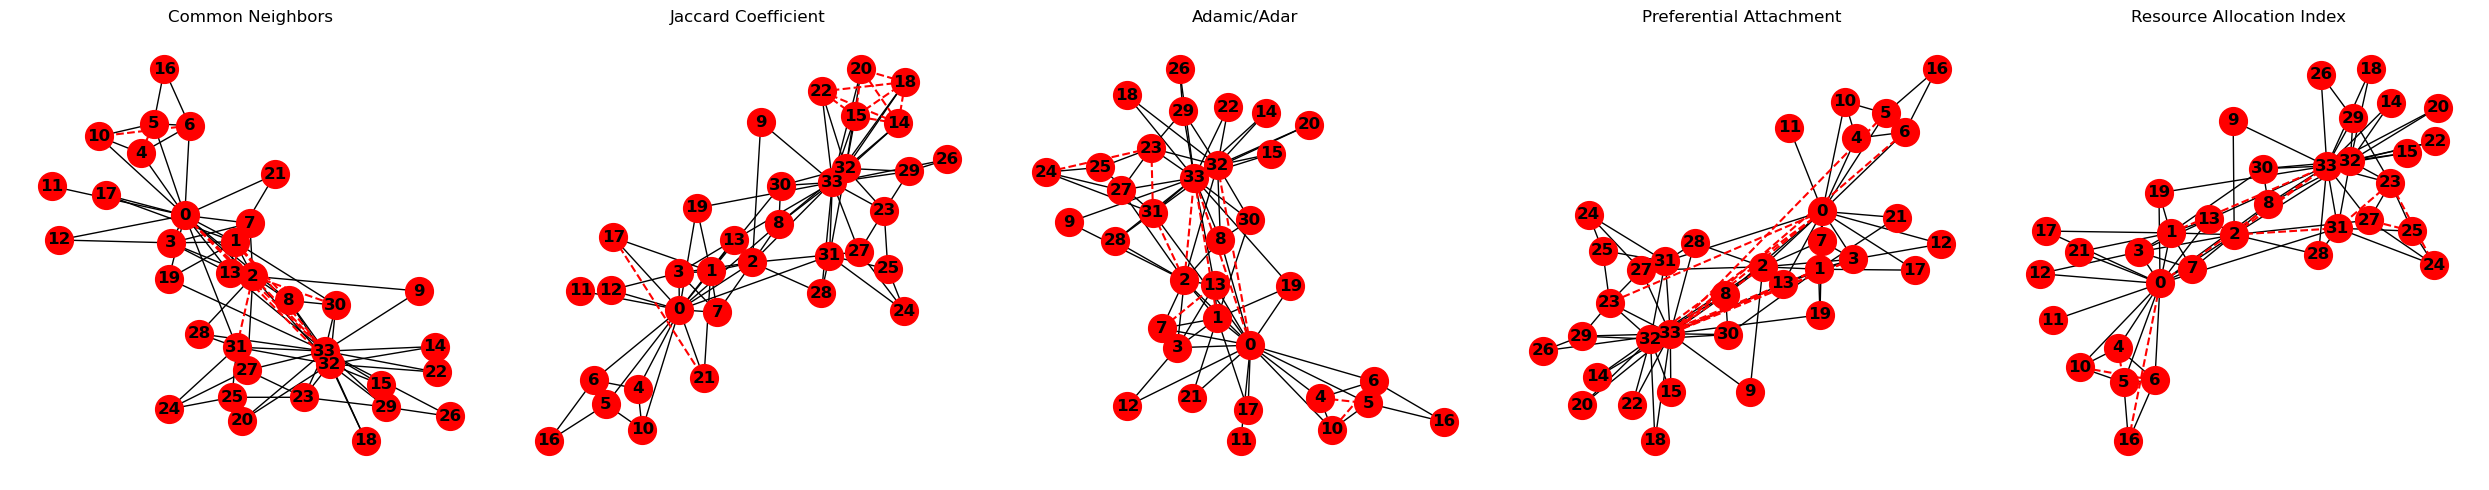

(2, 33):

Common Neighbors
Adamic/Adar
Preferential Attachment
Resource Allocation Index

(0, 33):

Common Neighbors
Adamic/Adar
Preferential Attachment
Resource Allocation Index

(7, 13):

Common Neighbors
Adamic/Adar

(0, 32):

Common Neighbors
Adamic/Adar
Preferential Attachment

(1, 33):

Common Neighbors
Adamic/Adar
Preferential Attachment
Resource Allocation Index

(2, 31):

Common Neighbors
Adamic/Adar
Resource Allocation Index

(4, 5):

Common Neighbors
Adamic/Adar
Resource Allocation Index

(6, 10):

Common Neighbors
Adamic/Adar
Resource Allocation Index

(23, 31):

Adamic/Adar
Resource Allocation Index

(23, 24):

Adamic/Adar
Resource Allocation Index



In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize lists for link prediction metrics
CN = []  # Common Neighbors
JC = []  # Jaccard Coefficient
AA = []  # Adamic/Adar Index
PA = []  # Preferential Attachment
RA = []  # Resource Allocation Index
k = 10  # Display top k results

# Generate the Karate Club graph
G = nx.karate_club_graph()

# Get the number of nodes in the graph
n = nx.number_of_nodes(G)

# Calculate link prediction metrics for all node pairs
for x in range(n):
    for y in range(x + 1, n):
        if not G.has_edge(x, y):  # For node pairs without an edge
            # Calculate the number of common neighbors and add to the list
            CN.append(tuple([x, y, len(list(nx.common_neighbors(G, x, y)))]))
            # Calculate Jaccard Coefficient and add to the list
            JC.append(list(nx.jaccard_coefficient(G, [(x, y)]))[0])
            # Calculate Adamic/Adar Index and add to the list
            AA.append(list(nx.adamic_adar_index(G, [(x, y)]))[0])
            # Calculate Preferential Attachment Score and add to the list
            PA.append(list(nx.preferential_attachment(G, [(x, y)]))[0])
            # Calculate Resource Allocation Index and add to the list
            RA.append(list(nx.resource_allocation_index(G, [(x, y)]))[0])

# Display the top results for each link prediction metric
CN_top = sorted(CN, key=lambda x: x[2], reverse=True)[:k]  # Sort by common neighbors and display top k
JC_top = sorted(JC, key=lambda x: x[2], reverse=True)[:k]  # Sort by Jaccard Coefficient and display top k
AA_top = sorted(AA, key=lambda x: x[2], reverse=True)[:k]  # Sort by Adamic/Adar Index and display top k
PA_top = sorted(PA, key=lambda x: x[2], reverse=True)[:k]  # Sort by Preferential Attachment Score and display top k
RA_top = sorted(RA, key=lambda x: x[2], reverse=True)[:k]  # Sort by Resource Allocation Index and display top k

# Identify and display overlapping node pairs across metrics
def find_common_pairs(*lists):
    pairs = {}
    for metric_name, l in lists:
        for pair in l:
            node_pair = (pair[0], pair[1])
            if node_pair not in pairs:
                pairs[node_pair] = []
            pairs[node_pair].append(metric_name)
    return pairs

metrics = [
    ("Common Neighbors", CN_top),
    ("Jaccard Coefficient", JC_top),
    ("Adamic/Adar", AA_top),
    ("Preferential Attachment", PA_top),
    ("Resource Allocation Index", RA_top)
]

common_pairs = find_common_pairs(*metrics)
common_pairs_filtered = {k: v for k, v in common_pairs.items() if len(v) > 1}

# Function to visualize predicted links
def plot_predicted_links(ax, G, predicted_links, title):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=400, node_color="red", with_labels=True, font_weight='bold', ax=ax)
    
    for (u, v) in predicted_links:
        x = [pos[u][0], pos[v][0]]
        y = [pos[u][1], pos[v][1]]
        ax.plot(x, y, 'r--')
    
    ax.set_title(title)

# Visualize the top k predicted links in subplots
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

plot_predicted_links(axs[0], G, [(x, y) for (x, y, _) in CN_top], "Common Neighbors")
plot_predicted_links(axs[1], G, [(u, v) for (u, v, p) in JC_top], "Jaccard Coefficient")
plot_predicted_links(axs[2], G, [(u, v) for (u, v, p) in AA_top], "Adamic/Adar")
plot_predicted_links(axs[3], G, [(u, v) for (u, v, p) in PA_top], "Preferential Attachment")
plot_predicted_links(axs[4], G, [(u, v) for (u, v, p) in RA_top], "Resource Allocation Index")

plt.tight_layout()
plt.show()

# Display overlapping node pairs in the specified format
for pair, metrics in common_pairs_filtered.items():
    print(f"{pair}:\n")
    for metric in metrics:
        print(metric)
    print("")


---

## Visualization Using Random Walks and Word2Vec

This script aims to embed each node of the Karate Club social network into a 2-dimensional vector space using random walks and the Word2Vec model.

A random walk is a probabilistic process that starts from a specific point and moves randomly through a series of steps. In this script, a random walk begins at each node and moves probabilistically to adjacent nodes for 100 iterations, generating sequential data that captures relationships between nodes on the graph.

Word2Vec uses this sequential data to learn distributed representations of each node. Parameters such as the dimensionality of the embedding vectors and the window size, which controls how many neighboring nodes around a target node are considered, must be adjusted based on the data and objectives of the analysis.

The specific steps of the script are as follows:

**1. Generating Random Walks**  
Starting from each node in the graph, a random adjacent node is selected to generate sequential data. This process is repeated 100 times, collecting sequences of data for analysis. The random walk function takes three arguments: the network, the number of random walks, and the length of the random walk. These parameters should be adjusted according to the data and analysis goals.

**2. Training the Word2Vec Model**  
The collected sequential data is used to train the Word2Vec model. Word2Vec generates embedding vectors that represent each node based on the given sequential data. Parameters include the dimensionality of the embedding vectors and the window size, which controls how many neighboring nodes around the target node are considered.

**3. Visualizing the 2D Vectors**  
The resulting 2D vector representations are extracted, and each node is plotted on the graph. Nodes are positioned based on their vector representation, and their labels are displayed accordingly. At the same time, nodes are distinguished by their Karate Club faction, with nodes shown in red or blue based on their faction affiliation.

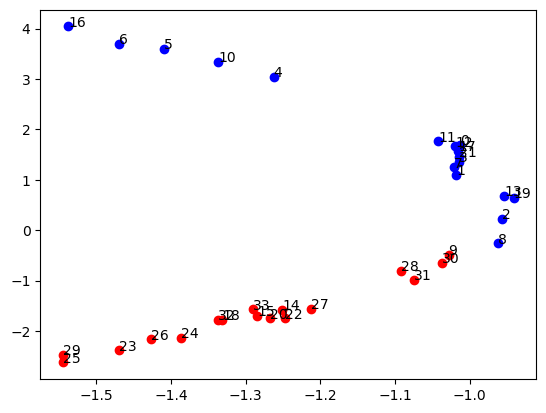

In [4]:
import networkx as nx  
import matplotlib.pyplot as plt  
import random  
from gensim.models import Word2Vec  # Import Word2Vec from Gensim to learn word vectors

def make_random_walks(G, num_of_walk, length_of_walk):
    """
    Function to generate random walks on graph G.
    
    Parameters:
    G: Graph (NetworkX graph object)
    num_of_walk: Number of walks to perform from each node
    length_of_walk: Length of each walk
    
    Returns:
    walks: A list of random walks, where each walk is a list of nodes.
    """
    walks = list()
    for i in range(num_of_walk):
        node_list = list(G.nodes())
        for node in node_list:
            current_node = node
            walk = list()
            walk.append(str(node))
            for j in range(length_of_walk):
                next_node = random.choice(list(G.neighbors(current_node)))
                walk.append(str(next_node))
                current_node = next_node
            walks.append(walk)
    return walks

# Generate the Karate Club graph
G = nx.karate_club_graph()

# Generate random walks on graph G
walks = make_random_walks(G, 100, 20)

# Train the Word2Vec model on the random walks
model = Word2Vec(walks, min_count=0, vector_size=2, window=5, workers=1)

# Initialize lists to store node coordinates and colors
x = list()
y = list()
node_list = list()
colors = list()

# Create figure and axis for plotting
fig, ax = plt.subplots()

# Get vector representations of each node and plot them
for node in G.nodes():
    vector = model.wv[str(node)]
    x.append(vector[0])
    y.append(vector[1])
    ax.annotate(str(node), (vector[0], vector[1]))  # Plot node labels
    if G.nodes[node]["club"] == "Officer":
        colors.append("r")  # Set nodes from the Officer club to red
    else:
        colors.append("b")  # Set other nodes to blue

# Plot each node
for i in range(len(x)):
    ax.scatter(x[i], y[i], c=colors[i])

# Show the graph
plt.show()


---
## Link Prediction Using Random Forest  
This script presents a suboptimal approach, revealing the author's lack of mathematical and statistical knowledge.

Random Forest is a type of ensemble learning in machine learning that improves prediction accuracy by combining multiple decision trees. This method is widely used in regression and classification problems. Below is an explanation of the key features and benefits of Random Forest:

**Basic Principles**  
**Ensemble Learning**  
Random Forest improves prediction accuracy and generalization by combining numerous decision trees. Each tree learns independently, and the final prediction is based on the average or majority vote of all trees.  

**Bootstrap Sampling**  
Each decision tree is trained using a subset of the original dataset obtained through bootstrap sampling (sampling with replacement). This introduces diversity among the decision trees as each tree learns from a different subset of data.  

**Random Feature Selection**  
At each split in a decision tree, only a random subset of features is considered for the best split. This reduces the correlation between trees, enhancing the overall ensemble performance.  

**Benefits of Random Forest**  
**High Prediction Accuracy**  
Compared to a single decision tree, Random Forest provides higher accuracy and reduces the risk of overfitting. By combining predictions from many trees, the impact of noise and outliers is minimized.  

**Improved Generalization**  
Random Forest can improve generalization performance without increasing model complexity. The diverse set of decision trees increases the model's ability to predict unseen data.  

**Robustness**  
Random Forest is robust against noise and missing values. Due to bootstrap sampling and feature selection, each tree is trained on different subsets, reducing the influence of outliers in the overall model.  

**Feature Importance Evaluation**  
Random Forest provides a way to evaluate the importance of each feature. It can quantitatively show which features contribute most to the prediction, based on the frequency of their use in decision tree splits or their information gain.

In this script, we generate the Karate Club graph and calculate features for each node pair to predict the presence of a link. Specifically, for each pair of nodes with and without an edge, we calculate four features: the number of common neighbors, Jaccard coefficient, Adamic-Adar index, and preferential attachment.

Next, a dataset is created using these features along with corresponding labels (1 for existing links, 0 for non-existing links). This dataset is split into training and test sets, and a Random Forest classifier is trained. Finally, predictions are made on the test set, and the accuracy is computed. Through this method, the script aims to predict the presence of links in the network accurately.

1. **Generating the Dataset**  
- The node pairs are stored in `X` as features, representing the likelihood of edges across the entire network.  
- `y` contains corresponding labels indicating whether the node pairs are actually connected by an edge (1: link exists, 0: no link).  

2. **Splitting the Training and Test Sets**  
- The data is split into training and test sets using `train_test_split`.  

3. **Training the Random Forest Model**  
- The RandomForestClassifier is trained using the dataset, with `n_estimators` representing the number of decision trees (100 trees are used here).  

4. **Evaluating on the Test Set**  
- Predictions are made on the test set, and the prediction accuracy is evaluated using `accuracy_score`.  
- The predicted node pairs with a link are displayed.  

Accuracy: 0.8053097345132744
Precision: 0.5714285714285714
Recall: 0.48
F1 Score: 0.5217391304347826
Cross-Validation Scores: [0.61061947 0.74107143 0.86607143 0.91071429 0.77678571]
Mean CV Score: 0.7810524652338812
Predicted links:
Node pair (23, 31) has link.
Node pair (24, 28) has link.
Node pair (29, 33) has link.
Node pair (26, 33) has link.
Node pair (5, 23) has link.
Node pair (0, 7) has link.
Node pair (2, 16) has link.
Node pair (13, 32) has link.
Node pair (0, 3) has link.
Node pair (30, 33) has link.
Node pair (30, 32) has link.
Node pair (15, 33) has link.
Node pair (24, 31) has link.
Node pair (6, 23) has link.
Node pair (0, 10) has link.
Node pair (28, 32) has link.
Node pair (2, 13) has link.
Node pair (8, 30) has link.
Node pair (1, 32) has link.
Node pair (2, 26) has link.
Node pair (1, 2) has link.


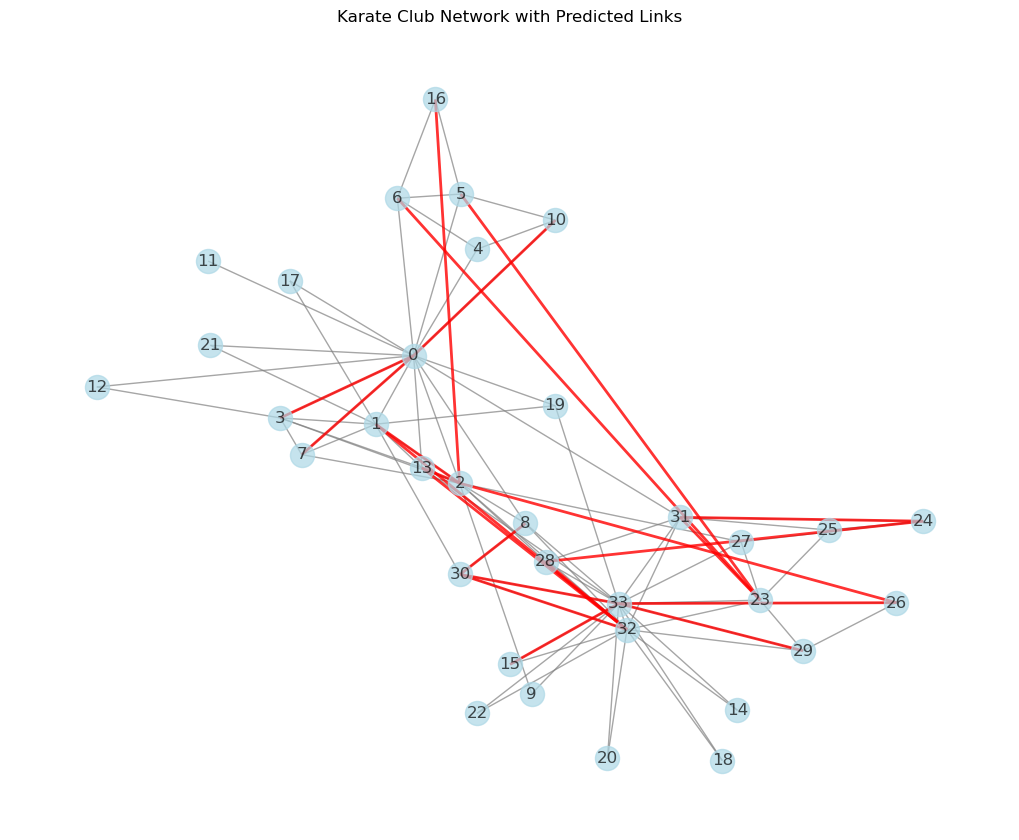

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the Karate Club dataset
G = nx.karate_club_graph()

# Generate features and labels
X = []
y = []
node_pairs = []
for i in range(len(G.nodes())):
    for j in range(i + 1, len(G.nodes())):
        # Calculate features
        common_neighbors = len(list(nx.common_neighbors(G, i, j)))
        jaccard = list(nx.jaccard_coefficient(G, [(i, j)]))[0][2]
        adamic_adar = list(nx.adamic_adar_index(G, [(i, j)]))[0][2]
        preferential_attachment = list(nx.preferential_attachment(G, [(i, j)]))[0][2]

        # Add features to the list
        X.append([common_neighbors, jaccard, adamic_adar, preferential_attachment])
        
        # Add node pairs to the list
        node_pairs.append((i, j))
        
        # Add labels to the list
        if G.has_edge(i, j):
            y.append(1)  # Link exists
        else:
            y.append(0)  # Link does not exist

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, node_pairs_train, node_pairs_test = train_test_split(X, y, node_pairs, test_size=0.2, random_state=42)

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Calculate cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

# Get predicted links from the test set
predicted_links = []
for idx, pred in enumerate(y_pred):
    if pred == 1:
        predicted_links.append(node_pairs_test[idx])

# Display the predicted link results
print("Predicted links:")
for (node_u, node_v) in predicted_links:
    print(f"Node pair ({node_u}, {node_v}) has link.")

# Draw the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Set the graph layout

# Draw all edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=1.0, alpha=0.7)

# Highlight predicted links
nx.draw_networkx_edges(G, pos, edgelist=predicted_links, edge_color='red', width=2.0, alpha=0.8)

plt.title('Karate Club Network with Predicted Links')
plt.show()


---
## Link Prediction in Karate Club Graph Using Node2Vec and RandomForest

This script implements a method for link prediction in the social network of the Karate Club. First, a portion of the network's edges is removed, and the Node2Vec model is used to learn vector representations of the nodes. These learned vector representations, along with several network metrics (such as the number of common neighbors, Jaccard coefficient, Adamic-Adar index, PageRank, clustering coefficient, etc.), are used as features to create a dataset of positive (existing links) and negative (non-existing links) examples. Using these features, a RandomForest classifier is trained to predict links in the test set. Furthermore, GridSearch is used to optimize the classifier's hyperparameters, and the optimal model is selected. Finally, the predicted links are visualized, and performance metrics such as accuracy, precision, recall, and F1 score are output. This script provides a practical approach for predicting hidden links in a network.

### Script Workflow
1. **Generate the Karate Club Graph**  
   - Create a graph that represents the social network of the Karate Club.

2. **Hide a Portion of the Edges**  
   - For testing link prediction, randomly remove 10% of the edges from the graph to create the training graph. **These removed edges will be used later as test data for link prediction.**

3. **Node2Vec for Node Embedding**  
   - Apply Node2Vec to the training graph to **convert each node into a numerical vector.** Node2Vec learns the graph structure through random walks and maps the similarity of nodes into a vector space, representing the relationships between nodes numerically.

4. **Create Positive and Negative Pairs**  
   - **Create pairs of nodes for positive examples (existing edges) and negative examples (non-existing edges).** Negative examples are sampled to match the number of positive examples, balancing the dataset and improving model performance.

5. **Feature Creation**  
   For each pair, the following features are calculated:
   - **Number of common neighbors**
   - **Jaccard coefficient**
   - **Adamic-Adar index**
   - **Preferential Attachment score**
   - **PageRank score**
   - **Clustering coefficient**  
   **These features are combined with the Node2Vec node embeddings to form the input data for the machine learning model.**

6. **Feature Selection**  
   - **Since not all features may be useful for link prediction, SelectKBest is used to select the top 20 most valuable features,** helping prevent overfitting and improving prediction accuracy.

7. **Model Training and Prediction**  
   - Split the data into training and test sets, and train a RandomForest classifier. **GridSearchCV** is used to find the best hyperparameters and maximize the model's performance.

8. **Prediction and Evaluation on the Test Set**  
   - Use the optimized classifier to predict the existence of links in the test set, and compare the predicted results with the removed edges. Performance metrics such as accuracy, precision, recall, and F1 score are computed.

9. **Visualization of Link Prediction Results**  
   - Visualize the original graph, the training graph (after edge removal), and the graph with predicted links to visually confirm the link prediction results.

### Execution Results
Running this script provides the following evaluation results:
- Accuracy: 0.9062
- Precision: 0.8750
- Recall: 0.9333
- F1 Score: 0.9032  
These metrics indicate how accurately the script predicted the removed edges, showing that the script achieves highly accurate link prediction.

Due to the nature of the script, results may vary each time it is executed. Further refinement is needed to obtain more consistent results.

---

This script applies an advanced analysis technique combining Node2Vec and machine learning to the complex task of link prediction. This approach highlights the power of machine learning in capturing intricate data patterns beyond human intuition. However, while these advanced analyses surpass traditional statistical methods, they still require human knowledge and insight for accurate interpretation and understanding of the results.

### Caution!
This script requires advanced computational processes, which may consume significant system resources during execution. Although optimization efforts have been made to reduce processing time, a mid-range or higher-spec computer is recommended for smooth execution. In particular, having sufficient RAM and a multi-core processor is highly desirable. It is also advised to close other applications running in the background to free up resources. As extended processing times are expected, please ensure that your power settings and cooling systems are properly configured.

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:01<00:00, 185.48it/s]


Accuracy: 0.8125
Precision: 0.8000
Recall: 0.8000
F1 Score: 0.8000


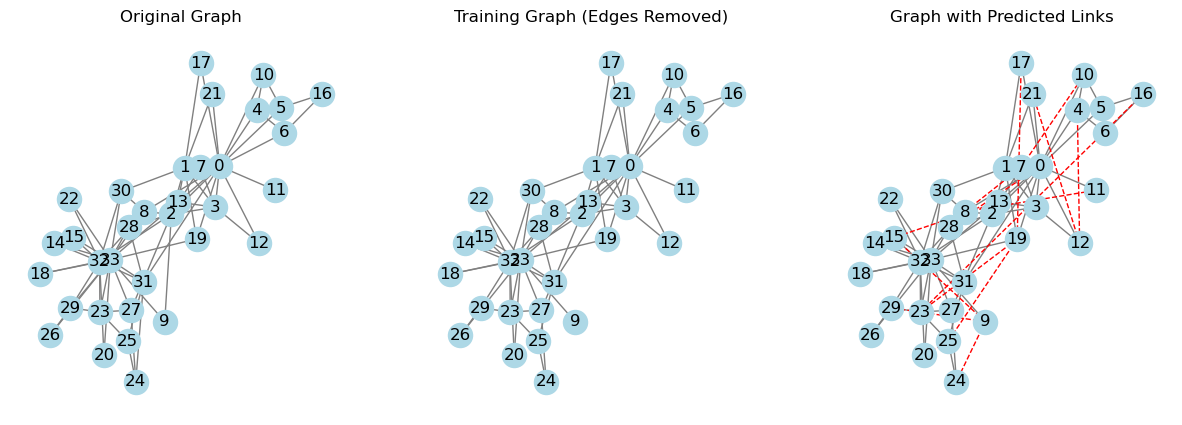

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from node2vec import Node2Vec
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
# import multiprocessing (Necessary when enabling multi-core processing)

# Generate Karate Club graph
G = nx.karate_club_graph()

# Hide some edges (for testing link prediction)
G_train = G.copy()
edges_to_remove = random.sample(list(G.edges()), int(0.1 * len(G.edges())))
G_train.remove_edges_from(edges_to_remove)

# Multi-core support: Get the number of available cores
# num_cores = multiprocessing.cpu_count()

# Generate Node2Vec model (disable this if using multi-core support)
node2vec = Node2Vec(G_train, dimensions=64, walk_length=40, num_walks=200, workers=1)
model = node2vec.fit(window=10, min_count=1)

# Generate Node2Vec model (use this for multi-core support)
# node2vec = Node2Vec(G_train, dimensions=64, walk_length=40, num_walks=200, workers=num_cores)
# model = node2vec.fit(window=10, min_count=1)

# Initialize a list to save the vector representations of each node
vlist = {str(node): model.wv[str(node)] for node in G.nodes()}

# Create pairs of positive (existing edges) and negative (non-existing edges) examples
positive_pairs = [(u, v) for u, v in G.edges()]
negative_pairs = [(u, v) for u in G.nodes() for v in G.nodes() if u < v and not G.has_edge(u, v)]
negative_pairs = random.sample(negative_pairs, len(positive_pairs))  # Sample negative pairs equal to the number of positive pairs

# Create features and labels
X = []
y = []

for u, v in positive_pairs + negative_pairs:
    vec_u = vlist[str(u)]
    vec_v = vlist[str(v)]
    common_neighbors = len(list(nx.common_neighbors(G, u, v)))
    jaccard = list(nx.jaccard_coefficient(G, [(u, v)]))[0][2]
    adamic_adar = list(nx.adamic_adar_index(G, [(u, v)]))[0][2]
    preferential_attachment = list(nx.preferential_attachment(G, [(u, v)]))[0][2]
    pagerank_u = nx.pagerank(G)[u]
    pagerank_v = nx.pagerank(G)[v]
    clustering_u = nx.clustering(G, u)
    clustering_v = nx.clustering(G, v)
    feature_vec = np.concatenate([vec_u, vec_v, [common_neighbors, jaccard, adamic_adar, preferential_attachment, pagerank_u, pagerank_v, clustering_u, clustering_v]])
    X.append(feature_vec)
    if (u, v) in positive_pairs:
        y.append(1)
    else:
        y.append(0)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection
selector = SelectKBest(f_classif, k=20)  # Select the best 20 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Hyperparameter optimization using grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_selected, y_train)
best_clf = grid_search.best_estimator_

# Predictions and evaluation on the test set
y_pred = best_clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Extract predicted links
predicted_links = []
for i, pred in enumerate(y_pred):
    if pred == 1:
        u, v = negative_pairs[i]
        predicted_links.append((u, v))

# Visualization
pos = nx.spring_layout(G)

plt.figure(figsize=(15, 5))

# Original graph
plt.subplot(1, 3, 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Original Graph")

# Training graph
plt.subplot(1, 3, 2)
nx.draw(G_train, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Training Graph (Edges Removed)")

# Graph with predicted links
plt.subplot(1, 3, 3)
nx.draw(G_train, pos, with_labels=True, node_color='lightblue', edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=predicted_links, edge_color='red', style='dashed')
plt.title("Graph with Predicted Links")

plt.show()
